# **Initial setup**

Install Bambu and required packages:

In [1]:
!echo "deb http://dk.archive.ubuntu.com/ubuntu/ xenial main universe" >> /etc/apt/sources.list
!echo "deb http://apt.llvm.org/bionic/ llvm-toolchain-bionic-11 main" >> /etc/apt/sources.list
!apt-get -o Acquire::AllowInsecureRepositories=true update
!apt-get -o Acquire::AllowInsecureRepositories=true --allow-unauthenticated install -y --no-install-recommends ca-certificates git libbdd-dev iverilog verilator gcc-4.9 gcc-4.9-plugin-dev gcc-4.9-multilib g++-4.9 g++-multilib gcc-multilib gcc-7-plugin-dev g++-multilib clang-6.0 libclang-6.0-dev clang-11 libclang-11-dev
!git clone https://github.com/SerenaC94/bambu-tutorial.git
!tar xf bambu-tutorial/panda-dist.tar.gz -C /
%env PATH=/opt/panda/bin:/usr/local/nvidia/bin:/usr/local/cuda/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/opt/bin

packing liblsan0:amd64 (8.4.0-1ubuntu1~18.04) over (8.3.0-26ubuntu1~18.04) ...
Preparing to unpack .../2-libtsan0_8.4.0-1ubuntu1~18.04_amd64.deb ...
Unpacking libtsan0:amd64 (8.4.0-1ubuntu1~18.04) over (8.3.0-26ubuntu1~18.04) ...
Preparing to unpack .../3-libcc1-0_8.4.0-1ubuntu1~18.04_amd64.deb ...
Unpacking libcc1-0:amd64 (8.4.0-1ubuntu1~18.04) over (8.3.0-26ubuntu1~18.04) ...
Preparing to unpack .../4-libatomic1_8.4.0-1ubuntu1~18.04_amd64.deb ...
Unpacking libatomic1:amd64 (8.4.0-1ubuntu1~18.04) over (8.3.0-26ubuntu1~18.04) ...
Preparing to unpack .../5-libgomp1_8.4.0-1ubuntu1~18.04_amd64.deb ...
Unpacking libgomp1:amd64 (8.4.0-1ubuntu1~18.04) over (8.3.0-26ubuntu1~18.04) ...
Preparing to unpack .../6-libgcc1_1%3a8.4.0-1ubuntu1~18.04_amd64.deb ...
Unpacking libgcc1:amd64 (1:8.4.0-1ubuntu1~18.04) over (1:8.3.0-26ubuntu1~18.04) ...
Setting up libgcc1:amd64 (1:8.4.0-1ubuntu1~18.04) ...
(Reading database ... 15001 files and directories currently installed.)
Preparing to unpack .../libc6_

# **Introduction**

Have a look at the C code for **Exercise 1**: /content/bambu-tutorial/01-introduction/Exercise1/module.c

Launch bambu:

In [3]:
%cd /content/bambu-tutorial/01-introduction/Exercise1
!bambu icrc.c --top-fname=icrc1 --simulator=VERILATOR --simulate --generate-tb=test_icrc1.xml -v2 --print-dot --pretty-print=a.c 2>&1 | tee icrc1.log

[Errno 2] No such file or directory: '/content/bambu-tutorial/01-introduction/Exercise1'
/opt/colab
 ==  Bambu executed with: bambu --top-fname=icrc1 --simulator=VERILATOR --simulate --generate-tb=test_icrc1.xml -v2 --print-dot --pretty-print=a.c icrc.c 


********************************************************************************
                    ____                  _
                   | __ )  __ _ _ __ ___ | |_   _   _
                   |  _ \ / _` | '_ ` _ \| '_ \| | | |
                   | |_) | (_| | | | | | | |_) | |_| |
                   |____/ \__,_|_| |_| |_|_.__/ \__,_|

********************************************************************************
                         High-Level Synthesis Tool

                         Politecnico di Milano - DEIB
                          System Architectures Group
********************************************************************************
                Copyright (C) 2004-2021 Politecnico di Milano
Version: PandA 

Inspect the generated files in the explorer tab on the left:

*   icrc1.v
*   test_icrc1.xml
*   simulate_icrc1.sh
*   synthesize_Synthesis_icrc1.sh



Visualize the FSM:

In [ ]:
from graphviz import Source
Source.from_file('HLS_output/dot/icrc1/HLS_STGraph.dot')

Navigate through the explorer to see the code for other exercises, **edit** this box to execute them:

In [ ]:
%cd /content/bambu-tutorial/01-introduction/Exercise2
!./bambu.sh

# **Target selection and tool integration**

**Exercise 1**: synthesize a module that returns the minimum and maximum value in an array.

Start by modifying the code below:

In [ ]:
%cd /content/bambu-tutorial/02-target_customization/Exercise1/

In [ ]:
%%writefile minmax.c
void max(int input[10], int * max)
{
   int local_max = input[0];
   int i = 0;
   for(i = 0; i < 10; i++)
   {
      if(input[i] > local_max)
      {
         local_max = input[i];
      }
   }
   *max = local_max;
}

Synthesize with bambu:

In [ ]:
!bambu minmax.c

**Exercise 2**: write a testbench to test arrays with different elemets and different sizes.

Start by modifying the code below **(change parameter names so that they correspond to function arguments in your code)**:

In [ ]:
%%writefile test.xml
<?xml version="1.0"?>
<function>
   <testbench input="{0,1,2,3,4}" num_elements="5"/>
</function>

In [ ]:
!bambu minmax.c --generate-tb=test.xml --simulate

**Exercise 3**: compare simulations across different target platforms and frequencies.

Start from the given command and modify the options appropriately to test the following combinations:


*   xc4vlx100-10ff1513 – 66MHz
*   5SGXEA7N2F45C1 – 200MHz
*   xc7vx690t-3ffg1930-VVD – 100MHz
*   xc7vx690t-3ffg1930-VVD – 333MHz
*   xc7vx690t-3ffg1930-VVD – 400MHz



In [ ]:
!bambu minmax.c --device-name=xc4vlx100-10ff1513 --clock-period=15 --simulate

# **Optimizations**

## **Exercise 1**: 

Modify Bambu options to evaluate the effect of:


*   different levels of optimization (-O0, -O1, -O2, -O3, -Os)
*   vectorization (-ftree-vectorize)
*   inlining (-finline-limit=100000)
*   different frontend compilers (--compiler={I386_GCC49|I386_GCC7|I386_CLANG6|I386_CLANG11})


In [ ]:
%cd /content/bambu-tutorial/03-optimizations/Exercise1/
!bambu adpcm.c -O0 --simulate

## **Exercise 2**: 

Use the command that yielded the best result in Exercise 1 and verify if SDC scheduling can introduce further improvements.

* -s or --speculative-sdc-scheduling

In [ ]:
%cd /content/bambu-tutorial/03-optimizations/Exercise1/
!bambu adpcm.c -O0 --simulate

## **Exercise 3**:

Modify Bambu options to evaluate the effect of different integer division implementations.

--hls-div=<method\>
* none  - use a HDL based pipelined restoring division
* nr1   - use a C-based non-restoring division with unrolling factor equal to 1 (default)
* nr2   - use a C-based non-restoring division with unrolling factor equal to 2
* NR    - use a C-based Newton-Raphson division
* as    - use a C-based align divisor shift dividend method


In [ ]:
%cd /content/bambu-tutorial/03-optimizations/Exercise3/
!bambu dfdiv.c --simulate --clock-period=15 --hls-div=none

## **Exercise 4**: 

Write C function that compute the following formula with single precision and double precision data types, experimenting with softfloat and libm implementations.

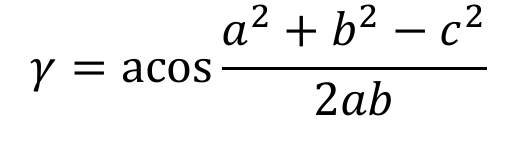

Start by editing this code and then try different bambu options:

In [ ]:
%%writefile /content/bambu-tutorial/03-optimizations/Exercise4/module.c
#include <math.h>
float awesome_math(float a, float b, float c)
{
   return acosf((powf(a,2) + powf(b,2) - powf(c,2))/(2*a*b));
}

In [ ]:
%cd /content/bambu-tutorial/03-optimizations/Exercise4/
!bambu module.c -O3 -lm --simulate --top-fname=awesome_math --generate-tb="a=3.0,b=4.0,c=5.0" --speculative-sdc-scheduling --libm-std-rounding --hls-fpdiv=G --soft-float